In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset:  covtype.csv

Source: Remote Sensing and GIS Program, Department of Forest Sciences, College of Natural Resources, Colorado State University

Description: Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

Variables/Columns

- Elevation: Elevation in meters
- Aspect: Aspect in degrees azimuth
- Slope: Slope in degrees
- Horizontal_Distance_To_Hydrology: Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology: Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways: Horz Dist to nearest roadway
- Hillshade_9am: Hillshade index at 9am, summer solstice
- Hillshade_Noon: Hillshade index at noon, summer soltice
- Hillshade_3pm: Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points: Horz Dist to nearest wildfire ignition points
- Wilderness_Area: 0 (absence) or 1 (presence)
- Cover_Type: (2 types) Forest Cover Type designation
    - 1: Spruce/Fir
    - 2: Lodgepole Pine

In [2]:
# Import data
df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_2/datasets/covtype.csv')
df

,elevation,aspect,slope,horz dist water,vert dist water,horz dist road,hillshade 9am,hillshade noon,hillshade 3pm,horz dist fire,wilderness area,cover
0,2900,341,19,216,97,4615,177,208,168,4999,1,1
1,3191,86,17,162,29,3946,242,210,93,1445,1,1
2,3090,108,10,42,10,3512,237,229,122,2932,1,1
3,3104,162,8,234,38,1728,228,242,147,2143,1,2
4,2693,255,12,0,0,1168,192,247,193,2481,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
49510,3045,87,4,228,44,42,226,233,142,661,1,1
49511,2582,1,18,0,0,924,192,203,146,3240,1,2
49512,3063,122,9,150,-15,920,236,233,127,1189,0,1
49513,2975,298,30,324,131,5689,125,215,223,4852,1,2


In [5]:
# Split features and target
X = df.drop('cover', axis=1)
y = df['cover']

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8935293642459003


In [9]:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=1, n_estimators=2).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.917654028436019
Testing Score: 0.7782534938201794


In [11]:
# Get the feature importance array
feature_importances = clf.feature_importances_

In [13]:
feature_importances

array([0.32450807, 0.0677875 , 0.04002315, 0.07400826, 0.0688079 ,
       0.12699861, 0.05292263, 0.05076179, 0.05020285, 0.11918206,
       0.02479717])

In [14]:
X.columns

Index(['elevation', 'aspect', 'slope', 'horz dist water', 'vert dist water',
       'horz dist road', 'hillshade 9am', 'hillshade noon', 'hillshade 3pm',
       'horz dist fire', 'wilderness area'],
      dtype='object')

In [12]:
# List the top 10 most important features
importance_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importance_sorted

[(0.32450807485541006, 'elevation'),
 (0.126998612737642, 'horz dist road'),
 (0.11918205961185625, 'horz dist fire'),
 (0.0740082553606088, 'horz dist water'),
 (0.06880790119670199, 'vert dist water'),
 (0.06778750286430676, 'aspect'),
 (0.052922633081185146, 'hillshade 9am'),
 (0.050761788743558675, 'hillshade noon'),
 (0.05020285333097344, 'hillshade 3pm'),
 (0.04002314942913173, 'slope'),
 (0.024797168788625253, 'wilderness area')]

In [16]:
features = sorted(zip(feature_importances, X.columns), key=lambda x: x[1])

In [18]:
cols = [f[0] for f in features]
width = [f[1] for f in features]

In [20]:
cols

[0.06778750286430676,
 0.32450807485541006,
 0.05020285333097344,
 0.052922633081185146,
 0.050761788743558675,
 0.11918205961185625,
 0.126998612737642,
 0.0740082553606088,
 0.04002314942913173,
 0.06880790119670199,
 0.024797168788625253]

In [19]:
width

['aspect',
 'elevation',
 'hillshade 3pm',
 'hillshade 9am',
 'hillshade noon',
 'horz dist fire',
 'horz dist road',
 'horz dist water',
 'slope',
 'vert dist water',
 'wilderness area']

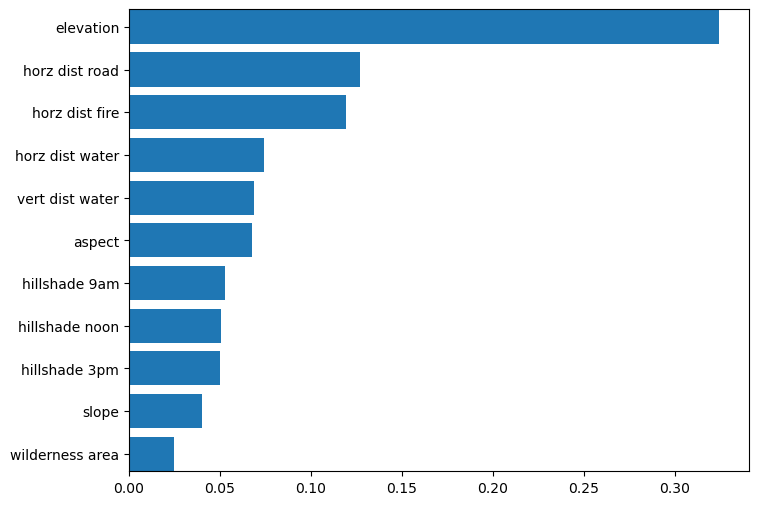

In [23]:
# Plot the feature importances
features = sorted(zip(feature_importances, X.columns), key=lambda x: x[0])
cols = [f[1] for f in features]
width = [f[0] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8, 6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)
plt.show()